In [1]:
from IPython.display import Video
from IPython.display import HTML

import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def get_imgs_path(img_dir):
    def sort_addr(addr):
        return int(os.path.basename(addr)[:-4])

    file_names = glob.glob(img_dir + '*.jpg')
    file_names.sort(key=sort_addr)

    return file_names

def get_imgs_list(img_dir):
    imgs_list = []
    imgs_path = get_imgs_path(img_dir)
    for path in imgs_path:
        imgs_list.append(cv2.imread(path))

    return imgs_list


def make_vid(img_dir, vid_path, fps=10.0, img_size=(640,480)):
    imgs_list = get_imgs_list(img_dir)
    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(vid_path, fourcc, fps, img_size)

    for i in range(len(imgs_list)):
        out.write(imgs_list[i])
    out.release()




In [10]:
class_name = 'ape'

img_dir = './train_log/linemod/eval_results/' + class_name + '/pose_vis/'
vid_path = './train_log/linemod/eval_results/' + class_name + '/vids/ape_best.avi'

In [11]:
# make images to video

make_vid(img_dir, vid_path)

[[371 263]
 [439 261]
 [363 207]
 [380 224]]


True

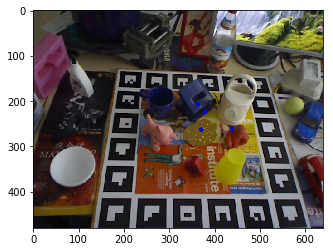

In [49]:
from common import Config
from utils.basic_utils import Basic_Utils

config = Config(ds_name='linemod', cls_type=class_name)

bs_utils = Basic_Utils(config)

K = config.intrinsic_matrix['linemod']

mesh_pts = np.array([[0,0,0],
                    [0.1,0,0],
                    [0,0.1,0],
                    [0,0,0.1]])

pose = np.array([[ 0.99613589, -0.07074413,  0.05204437,  0.06529821],
                [-0.03205665, -0.84457868, -0.53447092,  0.03069237],
                [ 0.08176628,  0.53073722, -0.84358299,  0.82492977]])


# pose = np.array([[ 0.999102,   -0.04088451,  0.01112188,  0.10172321]
#                 [-0.03097158, -0.88383514, -0.46677214, -0.06202122]
#                 [ 0.02891369,  0.46600848, -0.88430768,  0.92168695]])

mesh_pts = np.dot(mesh_pts, pose[:, :3].T) + pose[:, 3]

mesh_p2ds = bs_utils.project_p3d(mesh_pts, 1.0, K)
# color = bs_utils.get_label_color(obj_id, n_obj=22, mode=2)

img_sample = get_imgs_list(img_dir)[0]

np_rgb = bs_utils.draw_p2ds(img_sample, mesh_p2ds, r=5)


plt.imshow(np_rgb[:,:,::-1])
cv2.imwrite('test.jpg', np_rgb)

In [69]:
def draw_axis(img, pose, camera_matrix, camera_scale=1.0, thickness=5):
    axis_pts = np.array([[0,0,0],
                    [0.1,0,0],
                    [0,0.1,0],
                    [0,0,0.1]])
    axis_pts = np.dot(axis_pts, pose[:, :3].T) + pose[:, 3]
    axis_pts = bs_utils.project_p3d(axis_pts, camera_scale, camera_matrix)

    colors = [[250,0,0],
            [0,250,0],
            [0,0,250]]

    img_axis = img.copy()
    
    for i in range(3):
        img_axis = cv2.arrowedLine(img_axis, tuple(axis_pts[0]), tuple(axis_pts[i+1]), tuple(colors[i]), thickness)

    return img_axis

True

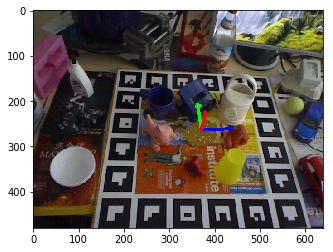

In [70]:
img_sample = get_imgs_list(img_dir)[0]

img_axis = draw_axis(img_sample, pose, K)
plt.imshow(img_axis[:,:,::-1])
cv2.imwrite('test.jpg', img_axis)

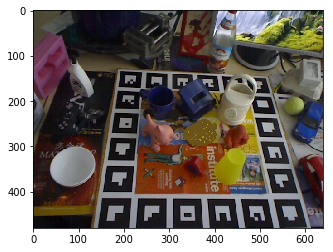

In [71]:
plt.imshow(img_sample[:,:,::-1])